In [9]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [10]:
cd "E:\Kaggle"

E:\Kaggle


In [11]:
import cv2,os

data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [12]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)



In [13]:
data=np.array(data)/255.0

data=np.reshape(data,(data.shape[0],img_size,img_size,1))

target=np.array(target)

new_target=np_utils.to_categorical(target)

In [14]:
np.save('data',data)
np.save('target',new_target)

In [15]:
data=np.load('data.npy')
target=np.load('target.npy')

## CNN Architecture 1

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='sigmoid'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.25)

In [17]:
train_data.shape

(1032, 100, 100, 1)

In [18]:
test_data.shape

(344, 100, 100, 1)

In [24]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 4s 4ms/step - loss: 0.6936 - accuracy: 0.4732 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
990/990 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4839
Epoch 3/20
990/990 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5071 - val_loss: 0.6933 - val_accuracy: 0.4839
Epoch 4/20
990/990 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5071 - val_loss: 0.6933 - val_accuracy: 0.4839
Epoch 5/20
990/990 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5071 - val_loss: 0.6933 - val_accuracy: 0.4839
Epoch 6/20
990/990 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5071 - val_loss: 0.6934 - val_accuracy: 0.4839
Epoch 7/20
990/990 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5071 - 

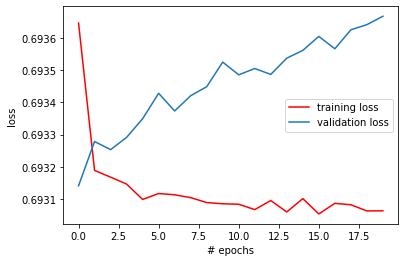

In [25]:


plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

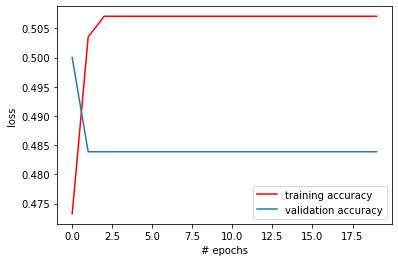

In [26]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## CNN Architecture 2

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten , Dropout
from keras.layers import Conv2D,MaxPooling2D

num_classes = 2
batch_size = 32

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
activation_3 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
activation_4 (Activation)    (None, 47, 47, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 67712)            

In [25]:
from keras.optimizers import Adam

epochs = 50

model.compile(loss='categorical_crossentropy',
             optimizer = Adam(lr=0.001),
             metrics = ['accuracy'])

In [26]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_accuracy',verbose=0,save_best_only=True,mode='auto')

fitted_model = model.fit(train_data,train_target,epochs=50,callbacks=[checkpoint],validation_split=0.2)

Train on 825 samples, validate on 207 samples
Epoch 1/50
825/825 [==============================] - 2s 2ms/step - loss: 0.6686 - accuracy: 0.6097 - val_loss: 0.6685 - val_accuracy: 0.5797
Epoch 2/50
825/825 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7297 - val_loss: 0.4630 - val_accuracy: 0.7633
Epoch 3/50
825/825 [==============================] - 1s 2ms/step - loss: 0.3580 - accuracy: 0.8448 - val_loss: 0.3126 - val_accuracy: 0.8792
Epoch 4/50
825/825 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9248 - val_loss: 0.2998 - val_accuracy: 0.8841
Epoch 5/50
825/825 [==============================] - 1s 2ms/step - loss: 0.1703 - accuracy: 0.9370 - val_loss: 0.2640 - val_accuracy: 0.9034
Epoch 6/50
825/825 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.9697 - val_loss: 0.2364 - val_accuracy: 0.9034
Epoch 7/50
825/825 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9721 - 

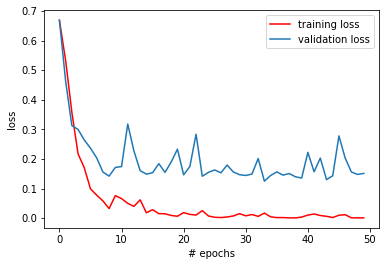

In [27]:
plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

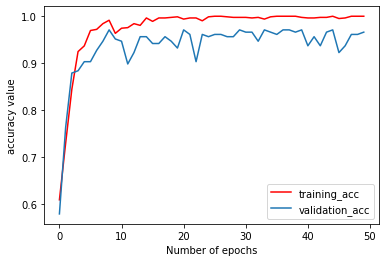

In [28]:
plt.plot(fitted_model.history['accuracy'],'r',label = 'training_acc')
plt.plot(fitted_model.history['val_accuracy'],label = 'validation_acc')
plt.xlabel('Number of epochs')
plt.ylabel('accuracy value')
plt.legend()
plt.show()

In [29]:
'''from keras.utils.vis_utils import plot_model
plot_model(model , to_file = 'face_mask_detection.png')
'''

"from keras.utils.vis_utils import plot_model\nplot_model(model , to_file = 'face_mask_detection.png')\n"

In [30]:
print(model.evaluate(test_data,test_target))

344/344 [==============================] - 0s 977us/step
[0.45710101550401644, 0.9331395626068115]
